In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
import cv2
from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16229706197352089214
xla_global_id: -1
]


In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [4]:
DataDirectory = "archive/train/"

In [5]:
Classes = ["0","1","2","3","4","5","6"]

In [6]:
training_Data = []
img_size = 244

def create_training_Data():
    for category in Classes:
        path = os.path.join(DataDirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_Data.append([new_array, class_num])
            except Exception as e:
                pass

In [7]:
create_training_Data()

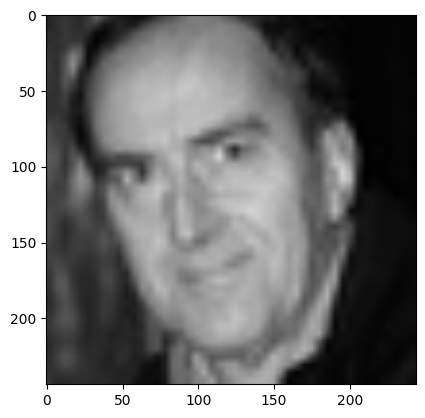

In [8]:
plt.imshow(training_Data[4][0])

In [9]:
print(len(training_Data[0][0]))

244


In [10]:
temp = np.array(training_Data, dtype=object)

In [11]:
temp.shape

(13511, 2)

In [12]:
import random
random.shuffle(training_Data)

In [13]:
X = []
Y = []

for features, label in training_Data:
    X.append(features)
    Y.append(label)
    


In [14]:
X = np.array(X)

In [15]:
X.shape

(13511, 244, 244, 3)

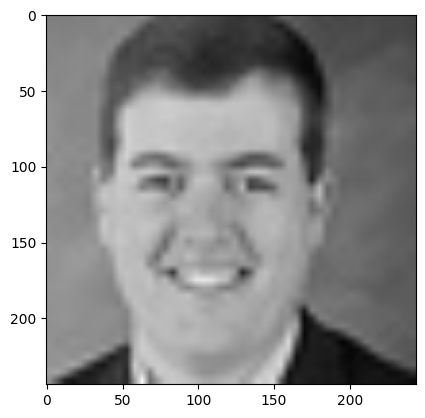

In [16]:
plt.imshow(X[5])

In [17]:
print(Y[5])

3


In [18]:
X = np.array(X).reshape(-1, img_size, img_size, 3)

In [19]:
X.shape

(13511, 244, 244, 3)

In [20]:
for i in X[0]:
    X[i] = X[i]/255.0

In [21]:
X.shape

(13511, 244, 244, 3)

In [22]:
Y = np.array(Y)

In [23]:
Y.shape

(13511,)

# TRAINNNNN TIMEEE

In [24]:
model = tf.keras.applications.MobileNetV2() # pre trained Model

In [25]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [26]:
base_input = model.layers[0].input

In [27]:
base_output = model.layers[-2].output

In [28]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [29]:
final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation='softmax')(final_output)


In [30]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [31]:
X.shape

(13511, 244, 244, 3)

In [32]:
new_model = keras.Model(inputs= base_input, outputs = final_output)

In [33]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [34]:
new_model.compile(loss= 'sparse_categorical_crossentropy', optimizer = 'adam', metrics=["accuracy"])

In [35]:
new_model.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [36]:
X.shape

(13511, 244, 244, 3)

In [37]:
type(Y)

numpy.ndarray

In [38]:

resized_images = []
for img in X:
    img = Image.fromarray(img)
    img = img.resize((224, 224))
    resized_images.append(np.array(img))
resized_images = np.array(resized_images)

In [39]:
resized_images.shape

(13511, 224, 224, 3)

In [40]:
checkpointer = ModelCheckpoint(filepath='model2.h5', save_best_only=True)

In [41]:
new_model.fit(resized_images, Y, batch_size=32, epochs=35)

Epoch 1/35
423/423 [==============================] - 643s 2s/step - loss: 1.3459 - accuracy: 0.4863
Epoch 2/35
423/423 [==============================] - 634s 1s/step - loss: 1.1458 - accuracy: 0.5666
Epoch 3/35
423/423 [==============================] - 629s 1s/step - loss: 1.0630 - accuracy: 0.6027
Epoch 4/35
423/423 [==============================] - 627s 1s/step - loss: 1.0006 - accuracy: 0.6310
Epoch 5/35
423/423 [==============================] - 627s 1s/step - loss: 0.9473 - accuracy: 0.6475
Epoch 6/35
423/423 [==============================] - 625s 1s/step - loss: 0.8813 - accuracy: 0.6762
Epoch 7/35
423/423 [==============================] - 624s 1s/step - loss: 0.8310 - accuracy: 0.6925
Epoch 8/35
423/423 [==============================] - 626s 1s/step - loss: 0.7743 - accuracy: 0.7154
Epoch 9/35
423/423 [==============================] - 626s 1s/step - loss: 0.7186 - accuracy: 0.7368
Epoch 10/35
423/423 [==============================] - 626s 1s/step - loss: 0.6639 - accura

In [42]:
new_model.save('Final_model2.h5')

In [43]:
new_model.fit(resized_images, Y, epochs=25, validation_split=0.2)

Epoch 1/25
206/338 [=================>............] - ETA: 3:16 - loss: 0.1285 - accuracy: 0.9522

KeyboardInterrupt: 

In [44]:
new_model2 = tf.keras.models.load_model('Final_model2.h5')

In [ ]:
new_model2.evaluate()

In [99]:
frame = cv2.imread('PrivateTest_4407805.jpg')

In [100]:
type(frame)

numpy.ndarray

In [101]:
frame.shape

(48, 48, 3)

In [102]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [103]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
gray.shape

(48, 48)

In [104]:
faces = faceCascade.detectMultiScale(gray, 1.1, 4)
x = 1
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0), 2)
    faces = faceCascade.detectMultiScale(roi_gray)
    if len(faces) == 0:
        print('no Face')
        x = 0
    else:
        for (ex,ey,ew,eh) in faces:
            face_roi = roi_color[ey:ey+eh, ex:ex+ew]

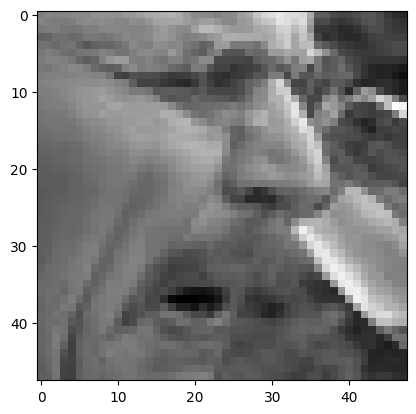

In [105]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [106]:
print(x)

1


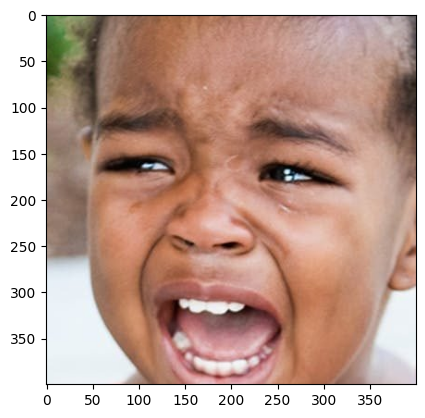

In [107]:
plt.imshow(cv2.cvtColor(face_roi,cv2.COLOR_BGR2RGB))

In [108]:

final_image = cv2.resize(frame, (224, 224))
final_image = np.expand_dims(final_image, axis = 0)

final_image= final_image/255.0


In [109]:
Predict = new_model2.predict(final_image)

1/1 [==============================] - 0s 29ms/step


In [110]:
Predict

array([[0.14130008, 0.02197653, 0.15353608, 0.2711476 , 0.17868167,
        0.13365576, 0.09970228]], dtype=float32)

In [111]:
np.argmax(Predict)

3